## Importações

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv('dragrace.csv')

In [3]:
df.head()

,Títulos,Nota,Sinopses,Temporada,Episódio,Franquia
0,Drag on a Dime,7.3,Nine contestants must re-invent their glam dra...,1,1,Drag Race
1,Girl Group Challenge,7.5,Wigs fly when the contestants split up into 2 ...,1,2,Drag Race
2,Queens of all Media,7.5,The queens must create an Oprah inspired look ...,1,3,Drag Race
3,M.A.C/Viva Glam Challenge,8.1,"With three queens down, RuPaul pairs the racer...",1,4,Drag Race
4,Drag School of Charm,7.6,RuPaul brings in a group of girl fighters to w...,1,5,Drag Race


## Pré-processamento

In [4]:
def remove_ponctuation(text):
  
  text = re.sub(r'[^\w\s]', '', text)
  return text

In [5]:
df['Sinopses'] = df.Sinopses.apply(remove_ponctuation)

In [6]:
df['Sinopses'] = df['Sinopses'].str.lower()

In [7]:
df['Sinopses'] = df.Sinopses.apply(word_tokenize) 

In [8]:
stopwords = nltk.corpus.stopwords.words('english')

In [9]:
stopwords = ' '.join(stopwords).replace("'","").split()

In [10]:
def remove_stopwords(text):
    return [item for item in text if item not in stopwords]

In [11]:
df['Sinopses'] = df.Sinopses.apply(remove_stopwords)

In [12]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [13]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [14]:
df['Sinopses'] = df.Sinopses.apply(lemmatize_text)

In [15]:
df.head()

,Títulos,Nota,Sinopses,Temporada,Episódio,Franquia
0,Drag on a Dime,7.3,"[nine, contestant, must, reinvent, glam, drag,...",1,1,Drag Race
1,Girl Group Challenge,7.5,"[wig, fly, contestant, split, 2, rival, girl, ...",1,2,Drag Race
2,Queens of all Media,7.5,"[queen, must, create, oprah, inspired, look, m...",1,3,Drag Race
3,M.A.C/Viva Glam Challenge,8.1,"[three, queen, rupaul, pair, racer, one, anoth...",1,4,Drag Race
4,Drag School of Charm,7.6,"[rupaul, brings, group, girl, fighter, work, c...",1,5,Drag Race


## Análises

In [16]:
import plotly.express as px

In [17]:
fig = px.histogram(df, x='Nota', title="Distribuição das Notas")
fig.show()

In [18]:
fig = px.bar(df.groupby(['Franquia']).mean().reset_index(), x='Nota', title="Nota média por Franquia", y= "Franquia", color = 'Franquia').update_yaxes(categoryorder = 'total ascending')
fig.update_layout(showlegend=False)
fig.show()

In [19]:
fig = px.histogram(df.groupby(['Temporada', 'Franquia']).max().reset_index(), x='Episódio', color = 'Franquia', title="Quantidade de episódios por Franquia")
fig.show()

In [20]:
fig = px.histogram(df.groupby(['Franquia']).max().reset_index(), x='Temporada', color = 'Franquia', title="Quantidade de episódios por Franquia")
fig.show()

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [22]:
def WordNuvem(df_series): 
    '''
    Concatena todos os textos do DataSeries e produz um WordCloud dos resultados
    '''
    text = df_series.sum()
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='black', width = 500, height = 300).generate(text)
    plt.figure(figsize=(12,10), facecolor='k' )
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

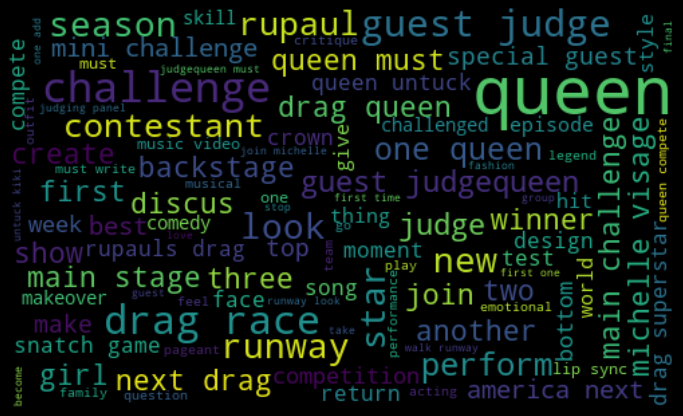

In [23]:
WordNuvem(df['Sinopses'].apply(' '.join))

In [24]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [25]:
count_vectorizer = CountVectorizer(binary=True)
X_BOW = count_vectorizer.fit_transform(df['Sinopses'].apply(' '.join))

In [26]:
df['Nota_binary'] = df['Nota'].apply(lambda x: 1 if x > 7.5 else 0)

In [27]:
X_bow = X_BOW.toarray()
y_bow = df['Nota_binary']

In [28]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size = 0.2)

In [29]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bow, y_train_bow)
naive_bayes_pred_bow = naive_bayes.predict(X_test_bow)

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [31]:
def resultados(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'Acurácia: {acc} \n F1: {f1} \n Precisão: {precision} \n Recall: {recall}')


In [32]:
resultados(y_test_bow, naive_bayes_pred_bow)

Acurácia: 0.680672268907563 
 F1: 0.7397260273972601 
 Precisão: 0.7105263157894737 
 Recall: 0.7714285714285715
